# GPT 4o with v2.26 v2 prompt

This notebook outlines the steps undertook to generate a prediction using GPT4o with prompt from 2/26/25 v2.

Using Claude prompt because the two models have similar prompt guide.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import gpt_instructions_v226_v2
MODEL_ID = "gpt-4o-2024-11-20"
SYSTEM_PROMPT = gpt_instructions_v226_v2

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 8
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 50.6 s, sys: 5.4 s, total: 56 s
Wall time: 14min 12s


[{'0001.91306_cites_88061.txt': {'model': 'gpt-4o-2024-11-20',
   'input_tokens': 5774,
   'output_tokens': 129,
   'prediction': 'yes',
   'confidence': 0.95,
   'rationale': 'The Acting Case explicitly states that certain positions taken in Texas v. White must be regarded as overruled. Specifically, the Acting Case rejects the position that the legislature of Texas could limit the negotiability of bonds and limits the applicability of the rule regarding negotiable government securities. These statements constitute Explicit Negative Actions, indicating that the Target Case has been overruled.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Texas v. White',
   'raw_results': '\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Texas v. White",\n  "overruled": "yes",\n  "confidence": 0.95,\n  "rationale": "The Acting Case explicitly states that certain positions taken in Texas v

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0001.91306_cites_88061.txt,gpt-4o-2024-11-20,5774,129,yes,0.95,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n{\n ""instructions"": ""Determine whether the ..."
1,0005.91306_cites_88693.txt,gpt-4o-2024-11-20,4838,137,no,0.85,The Acting Case discusses Huntington v. Texas ...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n{\n ""instructions"": ""Determine whether the ..."
2,0003.91306_cites_87633.txt,gpt-4o-2024-11-20,3380,138,no,0.95,The Acting Case explicitly reaffirms the rules...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n{\n ""instructions"": ""Determine whether the ..."
3,0004.91306_cites_88240.txt,gpt-4o-2024-11-20,4925,143,no,0.85,The passage discusses Texas v. Hardenberg and ...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n{\n ""instructions"": ""Determine whether the ..."
4,0002.91306_cites_88994.txt,gpt-4o-2024-11-20,4302,139,no,0.95,The Acting Case discusses the Target Case in d...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n{\n ""instructions"": ""Determine whether the ..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/4.gpt/1.gpt4o_v226_v2_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/4.gpt/1.gpt4o_v226_v2_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,gpt-4o-2024-11-20,5774,129,yes,0.95,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n{\n ""instructions"": ""Determine whether the ..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,gpt-4o-2024-11-20,4302,139,no,0.95,The Acting Case discusses the Target Case in d...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n{\n ""instructions"": ""Determine whether the ..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,gpt-4o-2024-11-20,3380,138,no,0.95,The Acting Case explicitly reaffirms the rules...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n{\n ""instructions"": ""Determine whether the ..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,gpt-4o-2024-11-20,4925,143,no,0.85,The passage discusses Texas v. Hardenberg and ...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n{\n ""instructions"": ""Determine whether the ..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,gpt-4o-2024-11-20,4838,137,no,0.85,The Acting Case discusses Huntington v. Texas ...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n{\n ""instructions"": ""Determine whether the ..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     896
yes    188
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

6050522

In [16]:
eval_df["output_tokens"].sum()

152920

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.94      0.96       935
         Yes       0.69      0.87      0.77       149

    accuracy                           0.93      1084
   macro avg       0.84      0.91      0.86      1084
weighted avg       0.94      0.93      0.93      1084



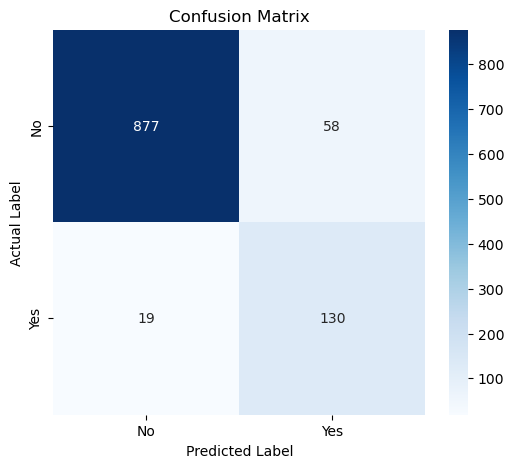

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.93
Precision: 0.69
Recall: 0.87
F-score: 0.77
Specificity: 0.94
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 130
True negatives: 877
False positives: 58
False negatives: 19


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

58

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

19

# Save the evaluation df

In [23]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,gpt-4o-2024-11-20,5774,129,yes,0.95,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n{\n ""instructions"": ""Determine whether the ..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,gpt-4o-2024-11-20,4302,139,no,0.95,The Acting Case discusses the Target Case in d...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n{\n ""instructions"": ""Determine whether the ..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,gpt-4o-2024-11-20,3380,138,no,0.95,The Acting Case explicitly reaffirms the rules...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n{\n ""instructions"": ""Determine whether the ..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,gpt-4o-2024-11-20,4925,143,no,0.85,The passage discusses Texas v. Hardenberg and ...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n{\n ""instructions"": ""Determine whether the ..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,gpt-4o-2024-11-20,4838,137,no,0.85,The Acting Case discusses Huntington v. Texas ...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n{\n ""instructions"": ""Determine whether the ..."


In [24]:
eval_df.to_csv("predictions/4.gpt/1.gpt4o_v226_v2_prompt_eval.csv", index=False)